### Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of  classification problems:
    * Binary classification
    * Multi class classification
    * MultiLabel Classification

#### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,
                    noise=.03,
                    random_state=42)

In [2]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check out Labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


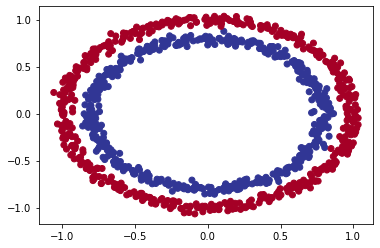

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shapes


In [6]:
# CHeck the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#How many samples were working with

len(X), len(y)


(1000, 1000)

In [8]:
#View the first example of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


In [9]:
#MY MODEL
## 1. Create a model
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1000,2)),
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

# 2 Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

2021-09-08 19:18:45.903474: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)
len(X), len(X_train), len(X_test)


(1000, 800, 200)

In [11]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2021-09-08 19:18:46.036049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


ValueError: in user code:

    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:245 sigmoid_cross_entropy_with_logits_v2
        return sigmoid_cross_entropy_with_logits(
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((32, 2) vs (32, 1))


In [ ]:
#Their Model
tf.random.set_seed(42)

#1 Create the model using the Sequential API

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2 Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 Fit the model
model_1.fit(X,y,epochs=5)

In [ ]:
#LEt's improve by improving by training for longer.
model_1.fit(X,y,epochs=200)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1 Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 Fit the model
model_2.fit(X,y,epochs=100)



In [ ]:
model_2.evaluate(X,y)

#Improve the model

#How can we improve our model?

1. Create a model - add layers and/or hidden units
2. Compiling a model - choose different optimizers  like adam instead of SGD
3. Fitting a model - Train on longer, (Increase epochs)

In [ ]:
tf.random.set_seed(42)

#1. create a model( this time 3 layers)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model

model_3.fit(X,y, epochs=100)


In [ ]:
model_3.evaluate(X,y)

In [ ]:
model_3(X)

#TO visualize our model's prediction letat create a function plot_decision_boundry, this function will:

*Take in a trained model, features(X), and labels(y)
* create a meshgrid of the different X values
*Make predictions across the mesh grid
* Plot the predictions as well as a line between zones(where each unique class falls)



In [12]:
import numpy as np

def plot_decision_boundary(model,X,y):
    """
    Plots the decision boundry created by a model predicting on X
    :param model:
    :param X:
    :param y:
    :return:
    """
    """
    Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    #Define the axis boundry created by a model predicting on X.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))


    #Create X value (Make predictions)

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    #Plot the decision boundry

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




In [13]:
plot_decision_boundary(model=model_3, X=X, y=y)


NameError: name 'model_3' is not defined

In [ ]:
#Let's see if our model can be used for a regression model

tf.random.set_seed(42)

#Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y= X + 100

#Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
#Fit our model to regression data

model_3(X_reg_train, y_reg_test, epochs=100)


Oh we compiled for a binarary classification problem but this is a regression problem.
We need to change the model to suit it.

In [ ]:
#Setup random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. COMPILE THE MODEL With Regression specific type of model in mind.
model_3.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3 Fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

In [ ]:
#Make prediction with trained model

y_reg_preds = model_3.predict(X_reg_test)


In [ ]:
#Plot it
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c = 'b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")

plt.legend();

In [ ]:
#THE MISSING PIECE: NON-LINEARITY
#Set trandom seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])
#Compile the Model

model_4.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_4.fit(X,y,epochs=100)

In [ ]:
plt.scatter(X[:,0], X[:,1], c= y, cmap=plt.cm.RdYlBu);

In [ ]:
#Check the decision boundaries

plot_decision_boundary(model = model_4,X = X,y = y)

In [ ]:
#Set random seed

tf.random.set_seed(42)

#1. Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

#compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#FIT

history = model_5.fit(X,y,epochs=100)

In [ ]:
#TIME TO REPLICATER THE MULTI LAYER PLAYGROUND IN TF CODE

tf.random.set_seed(47)

#1 Create the model

model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics= ["accuracy"])

#Fit Model

history = model_6.fit(X,y,epochs=250)

In [ ]:
plot_decision_boundary(model_6, X=X, y =y)

In [21]:
tf.random.set_seed(49)

#1 Create the model

model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_7.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics= ["accuracy"])

#Fit Model

history = model_7.fit(X,y,epochs=250)

/Users/lightpharaoh/opt/anaconda3/envs/Classification_Tutorial/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 736us/step - loss: 0.6855 - accuracy: 0.5010
Epoch 3/250
32/32 [==============================] - 0s 657us/step - loss: 0.6840 - accuracy: 0.5300
Epoch 4/250
32/32 [==============================] - 0s 572us/step - loss: 0.6827 - accuracy: 0.5510
Epoch 5/250
32/32 [==============================] - 0s 529us/step - loss: 0.6816 - accuracy: 0.5630
Epoch 6/250
32/32 [==============================] - 0s 533us/step - loss: 0.6805 - accuracy: 0.5700

In [22]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


doing binary classification


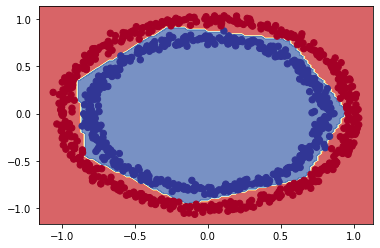

In [23]:

plot_decision_boundary(model_7, X=X, y =y)

In [24]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 576us/step - loss: 0.0296 - accuracy: 0.9980


[0.02961406484246254, 0.9980000257492065]

## The combination of linear and non-linear lis is the key to the fundamentals of neural networks.

In [26]:
#Create a toy tensor (similar to data passed in model)

A = tf.cast(tf.range(-10,10), tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

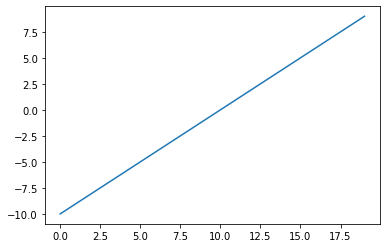

In [27]:
plt.plot(A)

In [28]:
#Lets start by replicating sigmoid : sigmoid(x) - 1 / (1+ exp(-x))

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

#use sigmoid on toy tensor


In [29]:
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

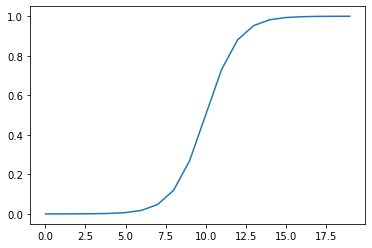

In [30]:
#Plot toy tensor transformed by Sigmoid

plt.plot(sigmoid(A))